In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras 
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import callbacks

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
X_train=np.load('/content/drive/MyDrive/DM/task7_X_train.npy',mmap_mode='r') #4138x224x224x3
y_train=np.load('/content/drive/MyDrive/DM/task7_y_train.npy',mmap_mode='r') #4138x4  [1,0,0,0]
X_test=np.load('/content/drive/MyDrive/DM/task7_X_test.npy',mmap_mode='r') #498x224x224x3
y_test=np.load('/content/drive/MyDrive/DM/task7_y_test.npy',mmap_mode='r') #498x4


**MLP**

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
print(X_train.shape)

(4138, 224, 224, 3)


In [ ]:
sc=StandardScaler()
nsamples, nx, ny, nz = X_train.shape
d2_train_dataset = X_train.reshape((nsamples,nx*ny*nz))

nsamples, nx, ny, nz = X_test.shape
d2_test_dataset = X_test.reshape((nsamples,nx*ny*nz))

scaler = sc.fit(d2_train_dataset)


In [ ]:
trainX_scaled = scaler.transform(d2_train_dataset)
testX_scaled = scaler.transform(d2_test_dataset)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

mlp = MLPClassifier()

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

grid_search = GridSearchCV(mlp, param_grid, cv=5, n_jobs=-1)
grid_search.fit(trainX_scaled, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

In [ ]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 300,activation = 'relu',
                        solver = 'sgd')

mlp_clf.fit(trainX_scaled, y_train)

In [ ]:
y_pred = mlp_clf.predict(testX_scaled)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.61


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.53      0.33      0.41        94
           1       0.38      0.28      0.32        93
           2       0.23      0.11      0.14       104
           3       0.53      0.60      0.56       207

   micro avg       0.47      0.39      0.43       498
   macro avg       0.42      0.33      0.36       498
weighted avg       0.44      0.39      0.40       498
 samples avg       0.37      0.39      0.38       498



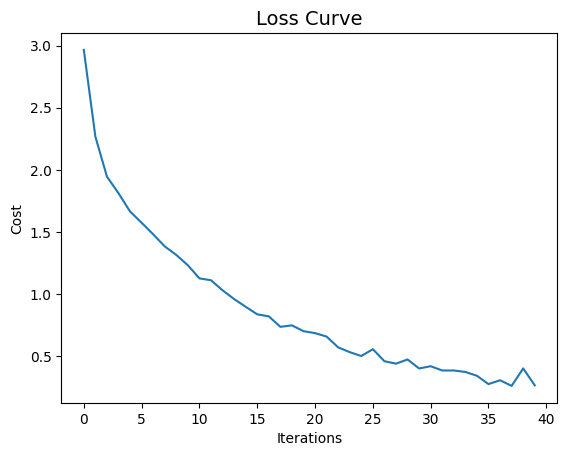

In [ ]:
print(classification_report(y_test, y_pred))

plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

**SVM**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras 
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import callbacks

import numpy as np
import pandas as pd
from tensorflow import keras  
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
X_train=np.load('/content/drive/MyDrive/DM/task7_X_train.npy',mmap_mode='r') #4138x224x224x3
y_train=np.load('/content/drive/MyDrive/DM/task7_y_train.npy',mmap_mode='r') #4138x4  [1,0,0,0]
X_test=np.load('/content/drive/MyDrive/DM/task7_X_test.npy',mmap_mode='r') #498x224x224x3
y_test=np.load('/content/drive/MyDrive/DM/task7_y_test.npy',mmap_mode='r') #498x4

In [ ]:
from sklearn.utils import shuffle

# Shuffle the training data
X_train, y_train = shuffle(X_train, y_train, random_state=42)

# Shuffle the test data
X_test, y_test = shuffle(X_test, y_test, random_state=42)


In [ ]:
X_train=X_train[:1000]
X_test=X_test
y_train=y_train[:1000]
y_test=y_test

In [ ]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(1250, 224, 224, 3) (1250, 4) (200, 224, 224, 3) (200, 4)


In [ ]:
l1=[]
for i in y_train:
  if(i[0]==1):
    l1.append(0)
  if(i[1]==1):
    l1.append(1)
  if(i[2]==1):
    l1.append(2)
  if(i[3]==1):
    l1.append(3)

y_train=l1
l1=[]

In [ ]:
l2=[]
for i in y_test:
  if(i[0]==1):
    l2.append(0)
  if(i[1]==1):
    l2.append(1)
  if(i[2]==1):
    l2.append(2)
  if(i[3]==1):
    l2.append(3)

y_test=l2
l2=[]

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
nsamples, nx, ny, nz = X_train.shape
d2_train_dataset = X_train.reshape((nsamples,nx*ny*nz))

nsamples, nx, ny, nz = X_test.shape
d2_test_dataset = X_test.reshape((nsamples,nx*ny*nz))

scaler = sc.fit(d2_train_dataset)
X_train = scaler.transform(d2_train_dataset)
X_test = scaler.transform(d2_test_dataset)


# Create the SVM classifier with a linear kernel and fit the data
svm_classifier = SVC(kernel='linear', C=1, decision_function_shape='ovr')
svm_classifier.fit(X_train, y_train)




SVC(C=1, kernel='linear')

In [ ]:
y_pred = svm_classifier.predict(X_test)

accuracy = svm_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.36


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.40      0.47        50
           1       0.21      0.33      0.26        36
           2       0.20      0.18      0.19        34
           3       0.44      0.42      0.43        80

    accuracy                           0.36       200
   macro avg       0.35      0.33      0.34       200
weighted avg       0.39      0.36      0.37       200



**CNN**

**i) Damage Level**

In [ ]:
X_train=np.load('/content/drive/MyDrive/DM/task7_X_train.npy',mmap_mode='r') #4138x224x224x3
y_train=np.load('/content/drive/MyDrive/DM/task7_y_train.npy',mmap_mode='r') #4138x4  [1,0,0,0]
X_test=np.load('/content/drive/MyDrive/DM/task7_X_test.npy',mmap_mode='r') #498x224x224x3
y_test=np.load('/content/drive/MyDrive/DM/task7_y_test.npy',mmap_mode='r') #498x4


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=57)
X_val=X_val/255.0
y_val=y_val/255.0

In [ ]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5),padding='same', activation='relu', kernel_initializer='normal',input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5),padding='same', activation='relu', kernel_initializer='normal'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2,padding="valid"),
    tf.keras.layers.BatchNormalization(axis=-1),

    tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5),padding='same', activation='relu', kernel_initializer='normal'),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(5,5),padding='same', activation='relu', kernel_initializer='normal'),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(5,5),padding='same', activation='relu', kernel_initializer='normal'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2,padding="valid"),
    tf.keras.layers.BatchNormalization(axis=-1),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu', kernel_initializer='normal'),
    tf.keras.layers.BatchNormalization() ,
    tf.keras.layers.Dropout(rate=0.5),

    tf.keras.layers.Dense(4,activation='softmax')
])

In [ ]:
import tensorflow as tf
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=10000,
    decay_rate=0.9)
optimizer1 = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model1.compile(loss='categorical_crossentropy',optimizer=optimizer1,metrics=['accuracy'])

In [ ]:
aug = tf.keras.preprocessing.image.ImageDataGenerator(
          rescale=1./255,
          rotation_range=40,
          width_shift_range=0.2,height_shift_range=0.2,
          zoom_range=0.3,shear_range=0.2,
          horizontal_flip=True,vertical_flip=True,
          fill_mode='nearest'
          )

In [ ]:
earlystopping = callbacks.EarlyStopping(monitor="val_loss",mode="min",patience=5,restore_best_weights=True)

In [ ]:
hist1 = model1.fit(aug.flow(X_train, y_train), validation_data=(X_val,y_val), epochs=3, shuffle=True, callbacks=[earlystopping])

In [ ]:
y_pred = model1.predict(X_test)

conf=confusion_matrix(y_test,y_pred)

In [ ]:
print("\nConfusion Matrix")
print(conf)

tp1=conf[0][0]
fp1=conf[0][1]
fn1=conf[1][0]
tn1=conf[1][1]

acc1=(tp1+tn1)/(tp1+fp1+fn1+tn1)
prec1=tp1/(tp1+fp1)
rec1=tp1/(tp1+fn1)
fsc1=(2*tp1/((2*tp1)+fp1+fn1))

print("\nAccuracy")
print(acc1)
print("\nPrecision")
print(prec1)
print("\nRecall")
print(rec1)
print("\nF1 Score")
print(fsc1)

**ii) Damage State**

In [ ]:
X_train=np.load('/content/drive/MyDrive/DM/task2_X_train.npy',mmap_mode='r') #4138x224x224x3
y_train=np.load('/content/drive/MyDrive/DM/task2_y_train.npy',mmap_mode='r') #4138x4  [1,0,0,0]
X_test=np.load('/content/drive/MyDrive/DM/task2_X_test.npy',mmap_mode='r') #498x224x224x3
y_test=np.load('/content/drive/MyDrive/DM/task2_y_test.npy',mmap_mode='r') #498x4

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=57)
X_val=X_val/255.0
y_val=y_val/255.0

In [ ]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5),padding='same', activation='relu', kernel_initializer='normal',input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5),padding='same', activation='relu', kernel_initializer='normal'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2,padding="valid"),
    tf.keras.layers.BatchNormalization(axis=-1),

    tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5),padding='same', activation='relu', kernel_initializer='normal'),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(5,5),padding='same', activation='relu', kernel_initializer='normal'),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(5,5),padding='same', activation='relu', kernel_initializer='normal'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2,padding="valid"),
    tf.keras.layers.BatchNormalization(axis=-1),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu', kernel_initializer='normal'),
    tf.keras.layers.BatchNormalization() ,
    tf.keras.layers.Dropout(rate=0.5),

    tf.keras.layers.Dense(4,activation='softmax')
])

In [ ]:
import tensorflow as tf
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=10000,
    decay_rate=0.9)
optimizer2 = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model2.compile(loss='categorical_crossentropy',optimizer=optimizer2,metrics=['accuracy'])


In [ ]:
aug = tf.keras.preprocessing.image.ImageDataGenerator(
          rescale=1./255,
          rotation_range=40,
          width_shift_range=0.2,height_shift_range=0.2,
          zoom_range=0.3,shear_range=0.2,
          horizontal_flip=True,vertical_flip=True,
          fill_mode='nearest'
          )

In [ ]:
earlystopping = callbacks.EarlyStopping(monitor="val_loss",mode="min",patience=5,restore_best_weights=True)

In [ ]:
hist2 = model2.fit(aug.flow(X_train, y_train), validation_data=(X_val,y_val), epochs=100, shuffle=True, callbacks=[earlystopping])

Epoch 1/100


In [ ]:
y_pred = model2.predict(X_test)

conf=confusion_matrix(y_test,y_pred)

In [ ]:
print("\nConfusion Matrix")
print(conf)

tp2=conf[0][0]
fp2=conf[0][1]
fn2=conf[1][0]
tn2=conf[1][1]

acc2=(tp2+tn2)/(tp2+fp2+fn2+tn2)
prec2=tp2/(tp2+fp2)
rec2=tp2/(tp2+fn2)
fsc2=(2*tp2/((2*tp2)+fp2+fn2))

print("\nAccuracy")
print(acc2)
print("\nPrecision")
print(prec2)
print("\nRecall")
print(rec2)
print("\nF1 Score")
print(fsc2)

**iii) Collapse Mode**

In [ ]:
X_train=np.load('/content/drive/MyDrive/DM/task5_X_train.npy',mmap_mode='r') #4138x224x224x3
y_train=np.load('/content/drive/MyDrive/DM/task5_y_train.npy',mmap_mode='r') #4138x4  [1,0,0,0]
X_test=np.load('/content/drive/MyDrive/DM/task5_X_test.npy',mmap_mode='r') #498x224x224x3
y_test=np.load('/content/drive/MyDrive/DM/task5_y_test.npy',mmap_mode='r') #498x4

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=57)
X_val=X_val/255.0
y_val=y_val/255.0

In [ ]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5),padding='same', activation='relu', kernel_initializer='normal',input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5),padding='same', activation='relu', kernel_initializer='normal'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2,padding="valid"),
    tf.keras.layers.BatchNormalization(axis=-1),

    tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5),padding='same', activation='relu', kernel_initializer='normal'),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(5,5),padding='same', activation='relu', kernel_initializer='normal'),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(5,5),padding='same', activation='relu', kernel_initializer='normal'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2,padding="valid"),
    tf.keras.layers.BatchNormalization(axis=-1),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu', kernel_initializer='normal'),
    tf.keras.layers.BatchNormalization() ,
    tf.keras.layers.Dropout(rate=0.5),

    tf.keras.layers.Dense(4,activation='softmax')
])

In [ ]:
import tensorflow as tf
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=10000,
    decay_rate=0.9)
optimizer3 = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model3.compile(loss='categorical_crossentropy',optimizer=optimizer1,metrics=['accuracy'])


In [ ]:
aug = tf.keras.preprocessing.image.ImageDataGenerator(
          rescale=1./255,
          rotation_range=40,
          width_shift_range=0.2,height_shift_range=0.2,
          zoom_range=0.3,shear_range=0.2,
          horizontal_flip=True,vertical_flip=True,
          fill_mode='nearest'
          )

In [ ]:
earlystopping = callbacks.EarlyStopping(monitor="val_loss",mode="min",patience=5,restore_best_weights=True)

In [ ]:
hist3 = model3.fit(aug.flow(X_train, y_train), validation_data=(X_val,y_val), epochs=10, shuffle=True, callbacks=[earlystopping])

In [ ]:
y_pred = model3.predict(X_test)

conf=confusion_matrix(y_test,y_pred)

In [ ]:
print("\nConfusion Matrix")
print(conf)

tp3=conf[0][0]
fp3=conf[0][1]
fn3=conf[1][0]
tn3=conf[1][1]

acc3=(tp3+tn3)/(tp3+fp3+fn3+tn3)
prec3=tp3/(tp3+fp3)
rec3=tp3/(tp3+fn3)
fsc3=(2*tp3/((2*tp3)+fp3+fn3))

print("\nAccuracy")
print(acc3)
print("\nPrecision")
print(prec3)
print("\nRecall")
print(rec3)
print("\nF1 Score")
print(fsc3)